In [58]:
import upath
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils, path_utils

In [ ]:
#compare accuracy across regularization values

#find the appropriate paths

#find folders/files on S3 with decoding results

paths={}
# path=path_utils.DECODING_ROOT_PATH

paths[10e2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e2_12-19-24")
paths[10e1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e1_12-19-24")
paths[10e0]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e0_12-19-24")
paths[10e-1]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-1_12-19-24")
paths[10e-2]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-2_12-19-24")
paths[10e-3]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-3_12-19-24")
paths[10e-4]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-4_12-19-24")
paths[10e-5]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-5_12-19-24")
paths[10e-6]=upath.UPath("s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/test_regularization_10e-6_12-19-24")


first_path=True
results_path_list=[]
for key in paths.keys():
    path=paths[key]
    for file in path.glob('*'):
        if 'results.csv' in str(file):
            # results_path_list.append(file)
            temp_results=pd.read_csv(file)
            temp_results['regularization']=key
            if first_path:
                results=temp_results
                first_path=False
            else:
                results=pd.concat([results,temp_results],axis=0)



In [43]:
results.columns

Index(['Unnamed: 0', 'session_id', 'project', 'area', 'ccf_ap_mean',
       'ccf_dv_mean', 'ccf_ml_mean', 'n_units', 'probe', 'cross_modal_dprime',
       'n_good_blocks', 'true_accuracy_20', 'null_accuracy_mean_20',
       'null_accuracy_median_20', 'null_accuracy_std_20', 'p_value_20',
       'true_accuracy_all_trials_no_shift_20', 'true_accuracy_all',
       'null_accuracy_mean_all', 'null_accuracy_median_all',
       'null_accuracy_std_all', 'p_value_all',
       'true_accuracy_all_trials_no_shift_all', 'regularization'],
      dtype='object')

In [70]:
results

,Unnamed: 0,session_id,project,area,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units,probe,cross_modal_dprime,...,null_accuracy_std_20,p_value_20,true_accuracy_all_trials_no_shift_20,true_accuracy_all,null_accuracy_mean_all,null_accuracy_median_all,null_accuracy_std_all,p_value_all,true_accuracy_all_trials_no_shift_all,regularization
0,0,668755_2023-08-30,DynamicRouting,PIR,4775.000000,5850.000000,2950.000000,9,NaN,1.763112,...,NaN,NaN,NaN,0.615977,0.554336,0.555134,0.042016,0.074074,0.614753,1000.00000
1,1,668755_2023-08-30,DynamicRouting,OLF,4750.000000,5800.000000,2950.000000,7,A,1.763112,...,NaN,NaN,NaN,0.570666,0.547287,0.547380,0.019429,0.098765,0.558437,1000.00000
2,2,668755_2023-08-30,DynamicRouting,CTXsp,4735.714286,5764.285714,2950.000000,7,NaN,1.763112,...,NaN,NaN,NaN,0.554009,0.502523,0.504792,0.030236,0.012346,0.554629,1000.00000
3,3,668755_2023-08-30,DynamicRouting,EPd,4638.888889,5418.518519,2910.185185,27,NaN,1.763112,...,0.091292,0.000000,0.830173,0.856438,0.687376,0.696474,0.100461,0.012346,0.855415,1000.00000
4,4,668755_2023-08-30,DynamicRouting,CP,4560.000000,5122.857143,2903.571429,35,NaN,1.763112,...,0.087305,0.012346,0.834794,0.831224,0.675519,0.680195,0.099165,0.049383,0.875030,1000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,33,668755_2023-08-30,DynamicRouting,MB,8177.222222,2418.333333,5593.333333,45,all,1.763112,...,0.027006,0.024691,0.642259,0.654905,0.612062,0.620621,0.037658,0.098765,0.686348,0.00001
34,34,668755_2023-08-30,DynamicRouting,MOs,3859.245283,1740.943396,4860.943396,265,all,1.763112,...,0.055682,0.000000,0.705976,0.893383,0.748040,0.732070,0.081913,0.049383,0.884410,0.00001
35,35,668755_2023-08-30,DynamicRouting,OLF,4210.714286,3988.392857,5120.982143,56,all,1.763112,...,0.034965,0.049383,0.633930,0.670583,0.593445,0.593962,0.052363,0.074074,0.691787,0.00001
36,36,668755_2023-08-30,DynamicRouting,RSPv,8417.229730,1384.628378,4938.344595,148,all,1.763112,...,0.011679,0.000000,0.594383,0.681473,0.605800,0.600385,0.035383,0.024691,0.659848,0.00001


In [ ]:
# savepath=r"D:\decoding_results_from_CO\regularization_test_12-20-24"
# results.to_csv(os.path.join(savepath,'decoding_results_regularization_comparison.csv'))

In [48]:
area_results=results.query('area=="MOs" and probe=="all"')

area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15740\2185131392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15740\2185131392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']


In [50]:
# area_results
# results.query('true_accuracy_20.isna()==False')

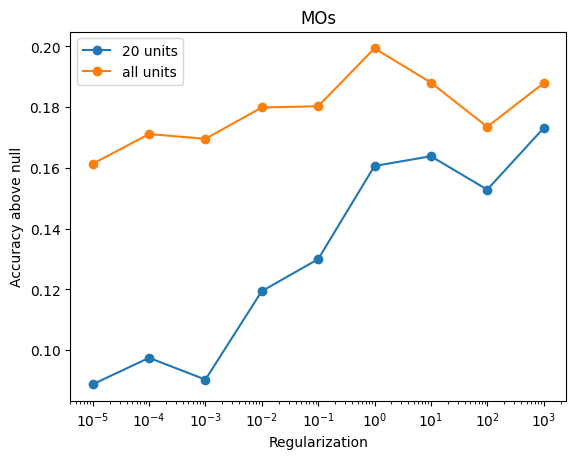

In [51]:
fig,ax=plt.subplots(1,1)
ax.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label='20 units')
ax.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label='all units')
ax.set_xscale('log')
ax.set_xlabel('Regularization')
ax.set_ylabel('Accuracy above null')
ax.set_title('MOs')
ax.legend()

In [52]:
unique_areas=results['area'].unique()
unique_areas

array(['PIR', 'OLF', 'CTXsp', 'EPd', 'CP', 'AId', 'GU', 'MOp', 'ORBl',
       'ORBvl', 'FRP', 'MOs', 'TTd', 'ACAv', 'ACAd', 'NPC', 'MB', 'SCop',
       'SCsg', 'RSPv', 'RSPd', 'MPT', 'PPT', 'NOT', 'HPF', 'VISam', 'LGv',
       'SSp', 'all', 'SCs'], dtype=object)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15740\3168236968.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15740\3168236968.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel

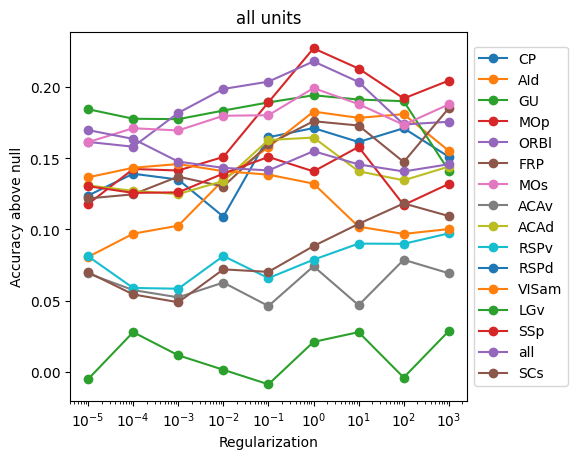

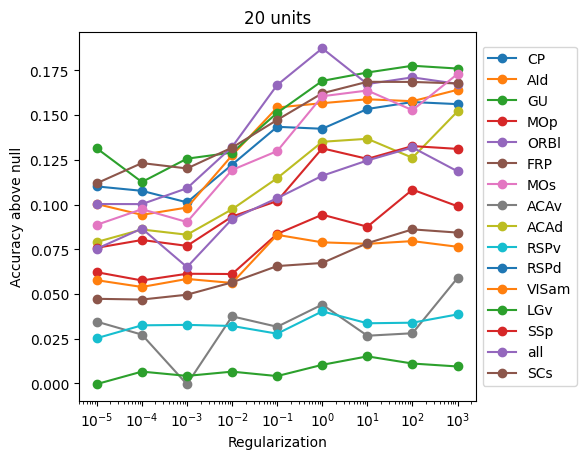

In [53]:
sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
           'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs']

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-20_decoder_regularization"

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label=area)
    ax_all.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label=area)

    fig,ax=plt.subplots(1,1)
    ax.plot(area_results['regularization'],area_results['diff_from_null_20'],'o-',label='20 units')
    ax.plot(area_results['regularization'],area_results['diff_from_null_all'],'o-',label='all units')
    ax.set_xscale('log')
    ax.set_xlabel('Regularization')
    ax.set_ylabel('Accuracy above null')
    ax.set_title(area)
    ax.legend()

    fig.savefig(os.path.join(savepath,area+'.png'))
    plt.close(fig)

ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null')
ax_20.set_title('20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,'all_areas_20.png'))

ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null')
ax_all.set_title('all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,'all_areas_all.png'))

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15740\2893684914.py:31: RuntimeWarning: Mean of empty slice
  ax_20.plot(area_results['regularization'],np.nanmean(all_areas_20,axis=0),'k-',label='mean',linewidth=3)


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

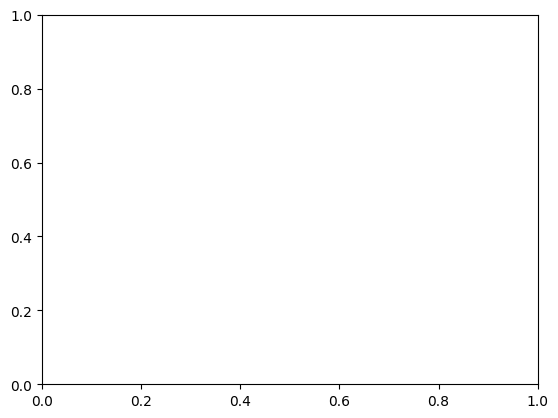

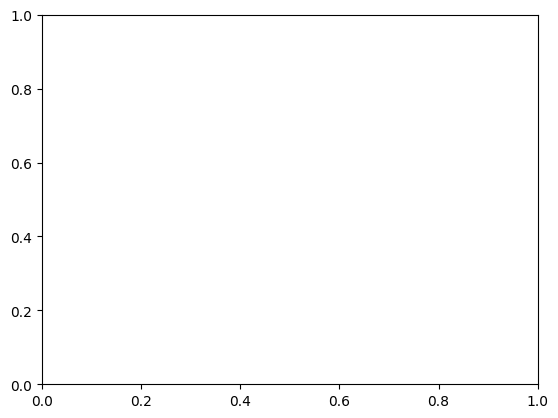

In [ ]:
# sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
#            'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs','SCm']
# sel_areas=['SCiw']

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-20_decoder_regularization"

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

all_areas_20=[]
all_areas_all=[]

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    if len(area_results)==0:
        continue

    area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['diff_from_null_20']-area_results['diff_from_null_20'].max(),'o-',label=area)
    ax_all.plot(area_results['regularization'],area_results['diff_from_null_all']-area_results['diff_from_null_all'].max(),'o-',label=area)

    all_areas_20.append(area_results['diff_from_null_20'].values-area_results['diff_from_null_20'].max())
    all_areas_all.append(area_results['diff_from_null_all'].values-area_results['diff_from_null_all'].max())

ax_20.plot(area_results['regularization'],np.nanmean(all_areas_20,axis=0),'k-',label='mean',linewidth=3)
ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null relative to max')
ax_20.set_title('20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,'all_areas_20_rel_to_max.png'))

ax_all.plot(area_results['regularization'],np.nanmean(all_areas_all,axis=0),'k-',label='mean',linewidth=3)
ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null relative to max')
ax_all.set_title('all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,'all_areas_all_rel_to_max.png'))

In [64]:
all_areas_20[10]

array([], dtype=float64)

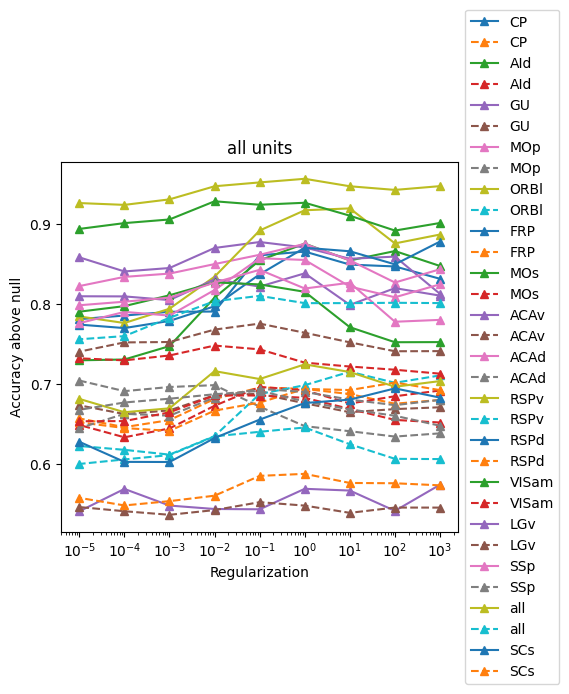

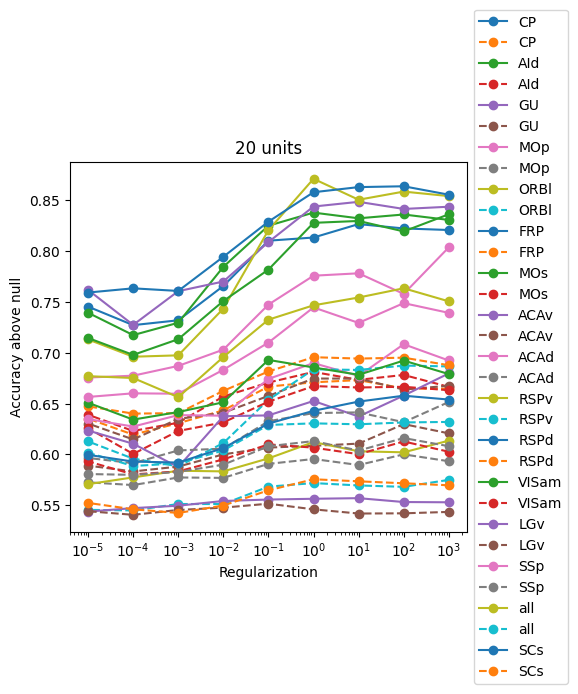

In [56]:
sel_areas=['CP', 'AId', 'GU', 'MOp', 'ORBl','FRP', 'MOs', 'ACAv', 
           'ACAd', 'RSPv', 'RSPd', 'VISam', 'LGv','SSp', 'all', 'SCs']

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-12-20_decoder_regularization\raw_decoder_accuracy"

fig_all,ax_all=plt.subplots(1,1)
fig_20,ax_20=plt.subplots(1,1)

for area in sel_areas:
    area_results=results.query('area==@area and true_accuracy_20.isna()==False')
    area_probes=area_results['probe'].unique()
    
    if 'all' in area_probes:
        area_results=area_results.query('probe=="all"')

    # area_results['diff_from_null_20']=area_results['true_accuracy_20']-area_results['null_accuracy_median_20']
    # area_results['diff_from_null_all']=area_results['true_accuracy_all']-area_results['null_accuracy_median_all']
    ax_20.plot(area_results['regularization'],area_results['true_accuracy_20'],'o-',label=area)
    ax_20.plot(area_results['regularization'],area_results['null_accuracy_median_20'],'o--',label=area)
    ax_all.plot(area_results['regularization'],area_results['true_accuracy_all'],'^-',label=area)
    ax_all.plot(area_results['regularization'],area_results['null_accuracy_median_all'],'^--',label=area)

    fig,ax=plt.subplots(1,1)
    ax.plot(area_results['regularization'],area_results['true_accuracy_20'],'o-',label='true acc; 20 units')
    ax.plot(area_results['regularization'],area_results['null_accuracy_median_20'],'o--',label='null acc; 20 units')
    ax.plot(area_results['regularization'],area_results['true_accuracy_all'],'^-',label='true acc; all units')
    ax.plot(area_results['regularization'],area_results['null_accuracy_median_all'],'^--',label='null acc; all units')
    ax.set_xscale('log')
    ax.set_xlabel('Regularization')
    ax.set_ylabel('Accuracy above null')
    ax.set_title(area)
    ax.legend()

    fig.savefig(os.path.join(savepath,area+'_raw.png'))
    plt.close(fig)

ax_20.set_xscale('log')
ax_20.set_xlabel('Regularization')
ax_20.set_ylabel('Accuracy above null')
ax_20.set_title('20 units')
box = ax_20.get_position()
ax_20.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_20.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_20.savefig(os.path.join(savepath,'all_areas_raw_20.png'))

ax_all.set_xscale('log')
ax_all.set_xlabel('Regularization')
ax_all.set_ylabel('Accuracy above null')
ax_all.set_title('all units')
box = ax_all.get_position()
ax_all.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax_all.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_all.savefig(os.path.join(savepath,'all_areas_raw_all.png'))